<a href="https://colab.research.google.com/github/arofenitra/Numerical-Linear-Algebra/blob/main/matrix_operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sp

### Matrix addition and multiplication and multiplication by scalar

If $A=(a_{ij})_{n\times n} , B=(a_{ij})_{n\times n} , \lambda \in \mathbb{C}$ then : $A+B=(a_{ij}+b_{ij})_{n\times n}$ , $A \cdot B=\left(\sum_{k=1}^n{a_{ik}b_{kj}} \right)_{n \times n}$ and $\lambda A=(\lambda a_{ij})_{n \times n}$

In [45]:
#we will take A and B as square matrix
def matrix_addition(A,B): #complexity O(n^2)
  n=len(A)
  if n==len(B):
    return [[A[i][j]+B[i][j] for j in range(n)] for i in range(n)]
  else:
    raise ValueError("matrix with different size cannot be added")

def matrix_multiplication_scalar(A,a): #complexity O(n^2)
  n=len(A)

  return [[a*A[i][j] for j in range(n)] for i in range(n)]

def matrix_multiplication(A,B): #complexity O(n^3)
  n=len(A)
  C=[[0 for _ in range(n)] for _ in range(n)]
  if len(A)!=len(B):
    raise ValueError("matrix with different size cannot be muliplied")
  for i in range(n):
    for j in range(n):
      C[i][j]=sum(A[i][k]*B[k][j] for k in range(n))
  return C

n=3
A=[[1/(i+j+1) for j in range(n)]for i in range(n)] #hilbert matrix
a=2
print("A= ",A)
print("2A= ",matrix_addition(A,A))
print("A^2= ",matrix_multiplication(A,A))

print("with numpy operation :")
A=np.array(A)
print(A+A)
print(A@A) #matrix multiplication with numpy

#plot the time of execution of numpy and the naive addition, multiplication
time_naive=[]
time_numpy=[]
time_naive_mul=[]
time_numpy_mul=[]

n=75
for i in range(n):
  A=sp.linalg.hilbert(i+1)
  A_list=list(A)
  start1=time.time()
  matrix_addition(A_list,A_list)

  time_naive.append(time.time()-start1)

  start2=time.time()
  A+A
  time_numpy.append(time.time()-start2)

  start3=time.time()
  matrix_multiplication(A_list,A_list)
  time_naive_mul.append(time.time()-start3)

  start4=time.time()
  np.dot(A,A)
  time_numpy_mul.append(time.time()-start4)



A=  [[1.0, 0.5, 0.3333333333333333], [0.5, 0.3333333333333333, 0.25], [0.3333333333333333, 0.25, 0.2]]
2A=  [[2.0, 1.0, 0.6666666666666666], [1.0, 0.6666666666666666, 0.5], [0.6666666666666666, 0.5, 0.4]]
A^2=  [[1.3611111111111112, 0.75, 0.525], [0.75, 0.4236111111111111, 0.3], [0.525, 0.3, 0.2136111111111111]]
with numpy operation :
[[2.         1.         0.66666667]
 [1.         0.66666667 0.5       ]
 [0.66666667 0.5        0.4       ]]
[[1.36111111 0.75       0.525     ]
 [0.75       0.42361111 0.3       ]
 [0.525      0.3        0.21361111]]


plotting the result of numpy addition-multiplication vs naive addition-multiplication

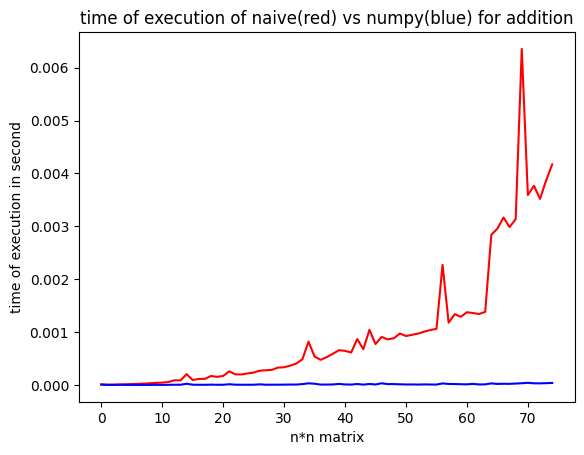

average time of execution of naive addition :  0.0010010560353597006
average time of execution of numpy addition :  1.3052622477213542e-05


In [58]:

plt.plot(time_naive,"-r",label="naive addition")
plt.plot(time_numpy,"-b",label="numpy addition")
plt.title("time of execution of naive(red) vs numpy(blue) for addition")
plt.ylabel("time of execution in second")
plt.xlabel("n*n matrix")


plt.show()
print("average time of execution of naive addition : ",np.sum(time_naive)/n)
print("average time of execution of numpy addition : ",np.sum(time_numpy)/n)

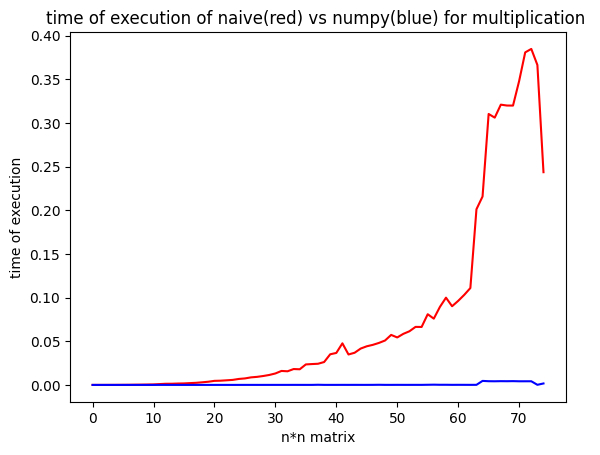

average time of execution of naive multiplication :  0.07362517992655436
average time of execution of numpy multiplication :  0.0005850474039713542


In [60]:
plt.title("time of execution of naive(red) vs numpy(blue) for multiplication ")
plt.plot(time_naive_mul,"-r",label="naive multiplication")
plt.plot(time_numpy_mul,"-b",label="numpy multiplication")
plt.ylabel("time of execution")
plt.xlabel("n*n matrix")
plt.show()
print("average time of execution of naive multiplication : ",np.sum(time_naive_mul)/n)
print("average time of execution of numpy multiplication : ",np.sum(time_numpy_mul)/n)